#<center> **IMAGE TEXT RECOGNITION**</center> 
<h3 align=right></h3>

---




## **Dataset Summary:** 
For this text recognition project we have taken EMNIST dataset to predict text from images. EMNIST dataset contains handwritten character digits derived from NSIT Special Database 19.There are six different splits available in the dataset namely: 

1. EMNIST ByClass
2. EMNIST ByMerge
3. EMNIST Balanced
4. EMNIST Letters
5. EMNIST Digits
6. EMNIST MNIST

Here, we have considered the EMNIST balanced dataset(taken from Kaggle), containing equal number of samples per class. 




## **Data Preprocessing:**

Let's start with preprocessing the data. 
There are basically the following steps involved:
1. Reading the dataset
2. Splitting the data into test and train sets
3. Converting the datasets to numpy arrays
4. Normalizing the X_train and X_test
5. One hot encoding of the labels in the train and test sets

So, before proceeding with these steps, let's import all the necessary libraries required for this project. 




In [1]:
#Loading necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
from tensorflow.keras import Sequential
from keras import optimizers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.models import load_model
from keras.models import model_from_json
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


Using TensorFlow backend.


In [2]:
from tensorflow.python.keras import backend as K

In [3]:
# Loading datasets (Datasource Link :https://www.kaggle.com/crawford/emnist)
train_set = pd.read_csv("C:/Users/roopa/Downloads/emnist-balanced-train.csv",delimiter = ',')
test_set = pd.read_csv("C:/Users/roopa/Downloads/emnist-balanced-test.csv", delimiter = ',')
map_set = pd.read_csv("C:/Users/roopa/Downloads/emnist_mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)

In [4]:
# Loading train and test datasets
X_train = train_set.values[:,1:]
X_test = test_set.values[:,1:]

In [5]:
# Loading train and test labels
y_train = train_set.values[:,0]
y_test = test_set.values[:,0]

In [6]:
# Viewing the shape of datasets
X_train.shape

(112799, 784)

In [7]:
y_train.shape

(112799,)

In [8]:
X_test.shape

(18799, 784)

In [9]:
y_test.shape

(18799,)

In [10]:
# Printing the details
print('Shape of training set: ', X_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of test set: ', X_test.shape)
print('Shape of test labels: ', y_test.shape)

Shape of training set:  (112799, 784)
Shape of training labels:  (112799,)
Shape of test set:  (18799, 784)
Shape of test labels:  (18799,)


In [11]:
# Converting datasets to numpy arrays
X_train = X_train.astype('float32')
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = X_test.astype('float32')
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
# Normalizing the datasets
X_train = X_train / 255
X_test = X_test / 255

In [13]:
# One hot encoding of the labelled array
y_train = np_utils.to_categorical(y_train,47)
y_test = np_utils.to_categorical(y_test,47)

## **Exploratory Data Analysis**





We can randomly selectly an image and see  how it appears. For that we need to convert it to 28 * 28 pixel image format first and then plot it. 

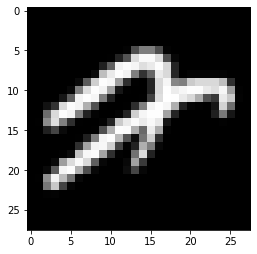

In [14]:
# Converting to 28*28 pixel format and viewing the image
sample=np.expand_dims(X_train[3],axis=0)
plt.figure(figsize=(4,6))
plt.imshow(sample.reshape(28,28),cmap='gray')

We can see that the images are not in proper orientations. We need to transpose the image inorder to make it appear in the correct orientation.

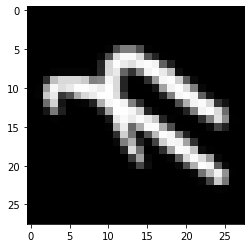

In [15]:
# Flipping the image
sample = sample.reshape([28, 28])
sample = np.fliplr(sample)
plt.imshow(sample,cmap='gray')

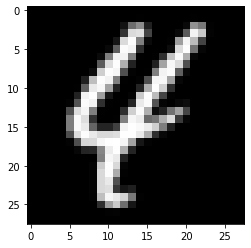

In [16]:
# Rotating the image
sample1 = np.rot90(sample)
plt.imshow(sample1,cmap='gray')

After flipping the image and rotating it, we got the correct image. Let's go ahead and do the same for all the images.

In [17]:
# Transposing all the characters in the dataset
def orient(img):
    img = img.reshape([28, 28])
    img = np.fliplr(img)
    img = np.rot90(img)
    return img.reshape([28 * 28])
X_train = np.apply_along_axis(orient, 1, X_train)/255
X_test = np.apply_along_axis(orient, 1, X_test)/255

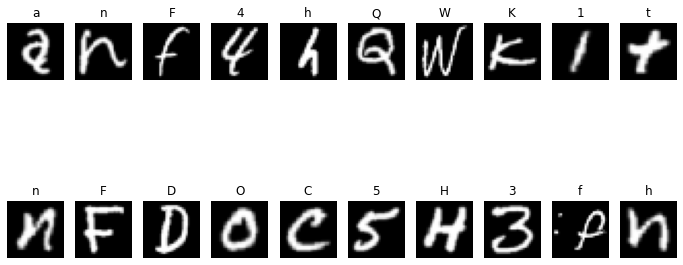

In [18]:
# Viewing the first 20 images
fig = plt.figure(figsize=(12,6))
for i in range (20):
  rows = 2
  columns = 10
  sp = fig.add_subplot( rows, columns , i+1) 
  sp.axis('Off')
  sample=np.expand_dims(X_train[i],axis=0)
  plt.imshow(X_train[i].reshape(28,28),cmap='gray')   
  train_y = train_set.iloc[:,0]
  plt.title(chr(map_set[train_y[i]]))

In [19]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0],1,28,28)
    X_test = X_test.reshape(X_test.shape[0],1,28,28)
    input_shape = (1, 28, 28)
else:
    X_train = X_train.reshape(X_train.shape[0],28,28,1)
    X_test = X_test.reshape(X_test.shape[0],28,28,1)
    input_shape = (28, 28, 1)

## **Data Modelling**

In [20]:
# Initializing hyperparameters
input_shape = (28,28,1)
classes = len(map_set)
batch_size = 256
filters = 128 
epochs=10
pool_size = (2, 2)  
kernel_size = 2

In [57]:
# Reshaping input into the form accepted by CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Define model architecture
model_2layers = tf.keras.Sequential()
# First layer
model_2layers.add(Conv2D(filters,
                 kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation='relu'))
model_2layers.add(MaxPooling2D(pool_size=pool_size))
model_2layers.add(Dropout(0.25))
# Second layer
model_2layers.add(Conv2D(filters,
                 kernel_size,
                 activation='relu'))
model_2layers.add(MaxPooling2D(pool_size=pool_size))
model_2layers.add(Dropout(0.5))

model_2layers.add(Flatten())
model_2layers.add(Dense(classes, activation='softmax'))

In [58]:
# Compile model
model_2layers.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
model_2layers.run_eagerly = True

In [59]:
# Fitting the model with epochs=12
history_2layers=model_2layers.fit(X_train, y_train,
                                  batch_size=batch_size,
                                  epochs=12,
                                  verbose=1,
                                  validation_split=0.1)

Epoch 1/12


ValueError: Shapes (256, 47, 47) and (256, 47) are incompatible

In [24]:
# Evaluating the model on test data
loss, accuracy = model_2layers.evaluate(X_test, y_test, verbose=0)
print ('Test loss ', loss )
print ('Test accuracy ', accuracy )
cnn_2layer_acc=accuracy

Test loss  0.8761388063430786
Test accuracy  0.7420075535774231


In [25]:
# One hot encoding of the labelled array
y_train = np_utils.to_categorical(y_train,47)
y_test = np_utils.to_categorical(y_test,47)

In [26]:
result = model_2layers.predict(X_test)
predicted_class = np.argmax(result, axis=1)
true_class = np.argmax(y_test, axis=1)

In [27]:
print(predicted_class)

[39  9 26 ...  1 26 33]


In [28]:
print(predicted_class[0])

39


In [29]:
dataframe = pd.read_csv("C:/Users/roopa/Downloads/Labels.csv", header=None)
dictionary = {}
dataframe = np.asarray(dataframe)
for i in range(len(dataframe[:,0])):
    dictionary[dataframe[i,0]] = dataframe[i,1]

In [33]:
print(dictionary.get(predicted_class[47]))

1


### **Saving Model**

In [31]:
model_json = model_2layers.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)


In [32]:
model_2layers.save_weights("model.h5")